<a href="https://colab.research.google.com/github/khayes39/firstrepo/blob/main/Hw5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
import torch
import torch.nn as nn
import pandas as pd
import torch.optim as opt
from matplotlib import pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


drive.mount('/content/drive')

file_path = '/content/drive/My Drive/ML/Data_sets/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))


xvarlist =  ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

x_vals = housing[xvarlist]
y_vals = housing['price']
x_vals.head()

#standardization
scaler = StandardScaler()
x_vals = scaler.fit_transform(x_vals)

#convert to tensor
x_vals = torch.tensor(x_vals)
y_vals = torch.tensor(y_vals)


#splitting into test and train
np.random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(x_vals, y_vals, train_size = 0.8, test_size = 0.2, random_state = 100)





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
#defining linear model and loss function and training loop

# weights = ['w1', 'w2', 'w3', 'w4', 'w5']
def model(X, w0, w1, w2, w3, w4, w5) :
    return w0 + X[:,0]*w1 + X[:,1]*w2 + X[:,2]*w3 + X[:,3]*w4 + X[:,4]*w5



def loss_fn(y_p, y) :
    squared_diff = (y_p - y)**2
    return squared_diff.mean()



def training_loop(n_epochs, opt, params, x_train, y_train, x_test, y_test):

    train_loss = []
    val_loss = []

    for epoch in range(0, n_epochs+1):
        #finding the current training loss
        train_pred = model(x_train, *params)
        curr_train_loss = loss_fn(train_pred, y_train)
        train_loss.append(curr_train_loss.item())

        val_pred = model(x_test, *params)
        val_loss.append(loss_fn(val_pred, y_test).item())

        opt.zero_grad()
        curr_train_loss.backward()
        opt.step()

        if epoch % 500 == 0:
            print(f"Epoch {epoch}: Training loss {train_loss[epoch]:.4f}, Validation loss {val_loss[epoch]:.4f}")

    return train_loss, val_loss








Current optimizer: SGD

Now testing SGD at learning rate: 0.1
Epoch 0: Training loss 26477590212965.9531, Validation loss 25158755127441.3672
Epoch 500: Training loss 1522069682827.6572, Validation loss 1596534476778.5637
Epoch 1000: Training loss 1522069682827.6572, Validation loss 1596534476778.5637
Epoch 1500: Training loss 1522069682827.6572, Validation loss 1596534476778.5637
Epoch 2000: Training loss 1522069682827.6572, Validation loss 1596534476778.5637
Epoch 2500: Training loss 1522069682827.6572, Validation loss 1596534476778.5637
Epoch 3000: Training loss 1522069682827.6572, Validation loss 1596534476778.5637
Epoch 3500: Training loss 1522069682827.6572, Validation loss 1596534476778.5637
Epoch 4000: Training loss 1522069682827.6572, Validation loss 1596534476778.5637
Epoch 4500: Training loss 1522069682827.6572, Validation loss 1596534476778.5637
Epoch 5000: Training loss 1522069682827.6572, Validation loss 1596534476778.5637
5001


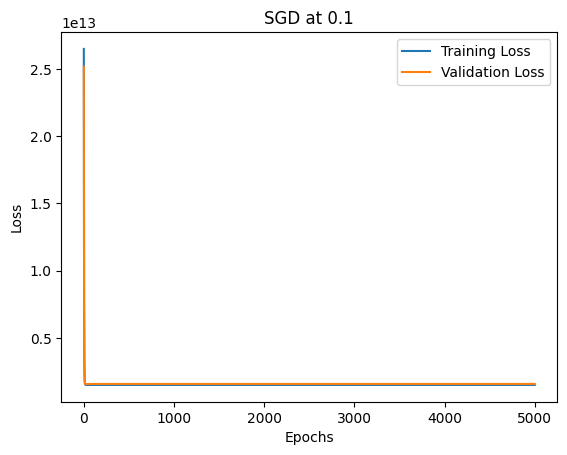


Now testing SGD at learning rate: 0.01
Epoch 0: Training loss 26477590212965.9531, Validation loss 25158755127441.3672
Epoch 500: Training loss 1522070510271.3723, Validation loss 1596297396592.1399
Epoch 1000: Training loss 1522069682988.9541, Validation loss 1596534422785.2300
Epoch 1500: Training loss 1522069682987.0344, Validation loss 1596534173697.3369
Epoch 2000: Training loss 1522069682987.0344, Validation loss 1596534173697.3369
Epoch 2500: Training loss 1522069682987.0344, Validation loss 1596534173697.3369
Epoch 3000: Training loss 1522069682987.0344, Validation loss 1596534173697.3369
Epoch 3500: Training loss 1522069682987.0344, Validation loss 1596534173697.3369
Epoch 4000: Training loss 1522069682987.0344, Validation loss 1596534173697.3369
Epoch 4500: Training loss 1522069682987.0344, Validation loss 1596534173697.3369
Epoch 5000: Training loss 1522069682987.0344, Validation loss 1596534173697.3369
5001


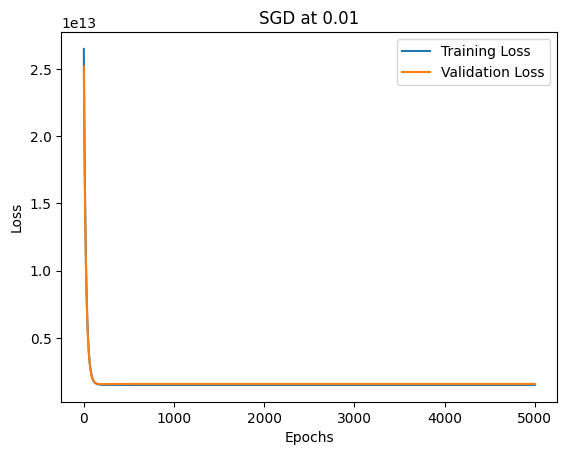


Now testing SGD at learning rate: 0.001
Epoch 0: Training loss 26477590212965.9531, Validation loss 25158755127441.3672
Epoch 500: Training loss 4670357380697.6914, Validation loss 4491761299718.0449
Epoch 1000: Training loss 1949348114775.1272, Validation loss 1930744365711.9553
Epoch 1500: Training loss 1582538270403.2695, Validation loss 1612746793641.4788
Epoch 2000: Training loss 1531117206930.6790, Validation loss 1584153408358.5391
Epoch 2500: Training loss 1523543833055.9741, Validation loss 1587738554424.0688
Epoch 3000: Training loss 1522339366237.7009, Validation loss 1591906729670.2925
Epoch 3500: Training loss 1522125802627.1106, Validation loss 1594257148311.0229
Epoch 4000: Training loss 1522082795661.9290, Validation loss 1595435658112.9438
Epoch 4500: Training loss 1522073019783.6995, Validation loss 1596008484014.3438
Epoch 5000: Training loss 1522070588993.1863, Validation loss 1596282763154.8750
5001


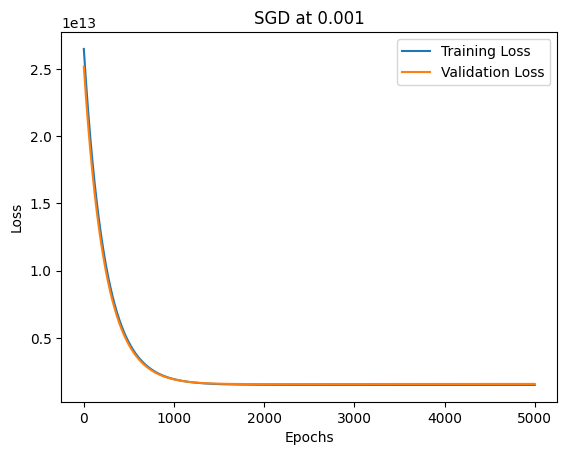


Now testing SGD at learning rate: 0.0001
Epoch 0: Training loss 26477590212965.9531, Validation loss 25158755127441.3672
Epoch 500: Training loss 21683442188935.3789, Validation loss 20615535991598.4688
Epoch 1000: Training loss 17842895547079.4531, Validation loss 16976982301953.9629
Epoch 1500: Training loss 14756903157512.1621, Validation loss 14053349125634.3145
Epoch 2000: Training loss 12270622781980.2910, Validation loss 11697508292085.7422
Epoch 2500: Training loss 10262875883631.2578, Validation loss 9794609241166.5566
Epoch 3000: Training loss 8638275362668.8174, Validation loss 8254412970525.7422
Epoch 3500: Training loss 7321416171196.7891, Validation loss 7005671046014.4590
Epoch 4000: Training loss 6252390297017.8213, Validation loss 5991813704460.2197
Epoch 4500: Training loss 5383411396636.8291, Validation loss 5167722045473.8438
Epoch 5000: Training loss 4676240386424.9326, Validation loss 4497279876466.0898
5001


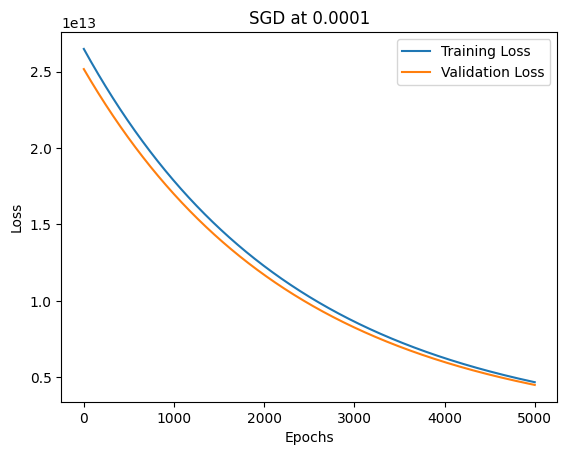



Current optimizer: Adam

Now testing Adam at learning rate: 0.1
Epoch 0: Training loss 26477590212965.9531, Validation loss 25158755127441.3672
Epoch 500: Training loss 26476687975299.6094, Validation loss 25157901825774.1914
Epoch 1000: Training loss 26475785819400.2617, Validation loss 25157048610205.8320
Epoch 1500: Training loss 26474883706694.6602, Validation loss 25156195447181.6953
Epoch 2000: Training loss 26473981688503.5742, Validation loss 25155342385044.5859
Epoch 2500: Training loss 26473079740429.1680, Validation loss 25154489394112.1289
Epoch 3000: Training loss 26472177824429.0156, Validation loss 25153636425125.9453
Epoch 3500: Training loss 26471275958106.3516, Validation loss 25152783507766.4141
Epoch 4000: Training loss 26470374143584.0742, Validation loss 25151930645773.7109
Epoch 4500: Training loss 26469472380862.1641, Validation loss 25151077839147.8477
Epoch 5000: Training loss 26468570669940.6328, Validation loss 25150225087888.8164
5001


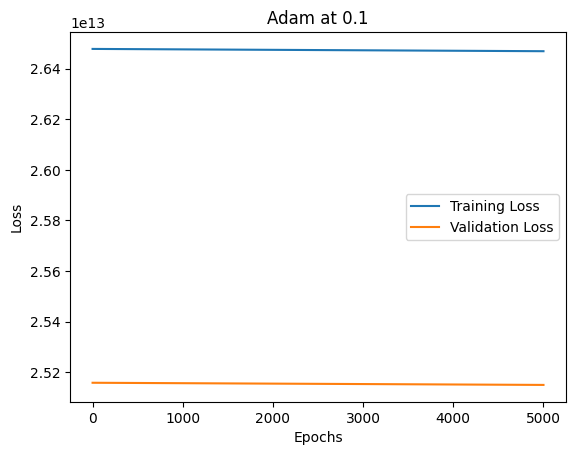


Now testing Adam at learning rate: 0.01
Epoch 0: Training loss 26477590212965.9531, Validation loss 25158755127441.3672
Epoch 500: Training loss 26477499985398.4805, Validation loss 25158669793213.3516
Epoch 1000: Training loss 26477409758540.2383, Validation loss 25158584459724.0586
Epoch 1500: Training loss 26477319530311.7812, Validation loss 25158499125480.9688
Epoch 2000: Training loss 26477229302457.5898, Validation loss 25158413791374.9453
Epoch 2500: Training loss 26477139075025.9922, Validation loss 25158328457545.8711
Epoch 3000: Training loss 26477048848112.6328, Validation loss 25158243124270.7305
Epoch 3500: Training loss 26476958633874.1641, Validation loss 25158157803094.4141
Epoch 4000: Training loss 26476868425206.0234, Validation loss 25158072487202.4766
Epoch 4500: Training loss 26476778217055.9375, Validation loss 25157987171864.2656
Epoch 5000: Training loss 26476688009423.8984, Validation loss 25157901857079.7852
5001


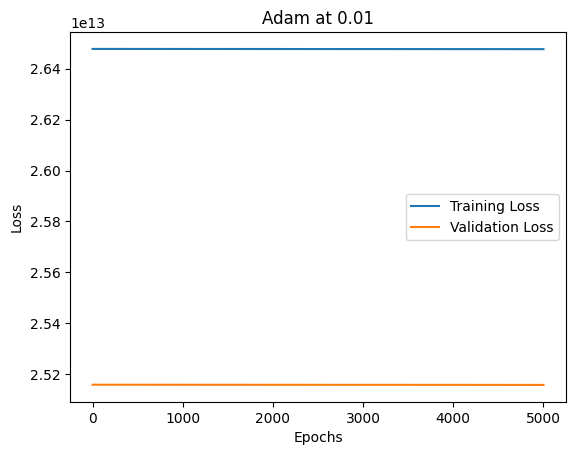


Now testing Adam at learning rate: 0.001
Epoch 0: Training loss 26477590212965.9531, Validation loss 25158755127441.3672
Epoch 500: Training loss 26477581189998.9258, Validation loss 25158746593812.3320
Epoch 1000: Training loss 26477572167066.9102, Validation loss 25158738060216.2109
Epoch 1500: Training loss 26477563144471.5234, Validation loss 25158729526955.9844
Epoch 2000: Training loss 26477554122007.1758, Validation loss 25158720993799.7969
Epoch 2500: Training loss 26477545099914.6055, Validation loss 25158712461006.3594
Epoch 3000: Training loss 26477536077827.2188, Validation loss 25158703928218.4531
Epoch 3500: Training loss 26477527055745.0039, Validation loss 25158695395436.0898
Epoch 4000: Training loss 26477518033667.9805, Validation loss 25158686862659.2656
Epoch 4500: Training loss 26477509011594.1211, Validation loss 25158678329886.1289
Epoch 5000: Training loss 26477499989527.4531, Validation loss 25158669797120.3789
5001


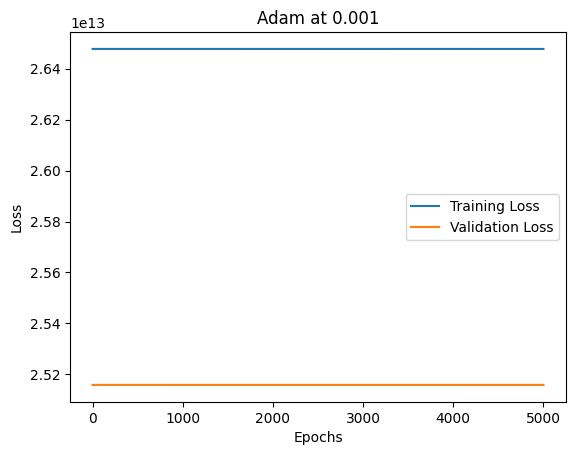


Now testing Adam at learning rate: 0.0001
Epoch 0: Training loss 26477590212965.9531, Validation loss 25158755127441.3672
Epoch 500: Training loss 26477589310609.7539, Validation loss 25158754274020.3203
Epoch 1000: Training loss 26477588408249.3945, Validation loss 25158753420595.1289
Epoch 1500: Training loss 26477587505885.8594, Validation loss 25158752567167.8906
Epoch 2000: Training loss 26477586603522.3125, Validation loss 25158751713740.6523
Epoch 2500: Training loss 26477585701158.8672, Validation loss 25158750860313.5195
Epoch 3000: Training loss 26477584798858.4219, Validation loss 25158750006944.2461
Epoch 3500: Training loss 26477583896558.0273, Validation loss 25158749153575.0312
Epoch 4000: Training loss 26477582994257.6836, Validation loss 25158748300205.8711
Epoch 4500: Training loss 26477582091957.3906, Validation loss 25158747446836.7617
Epoch 5000: Training loss 26477581189657.1484, Validation loss 25158746593467.7188
5001


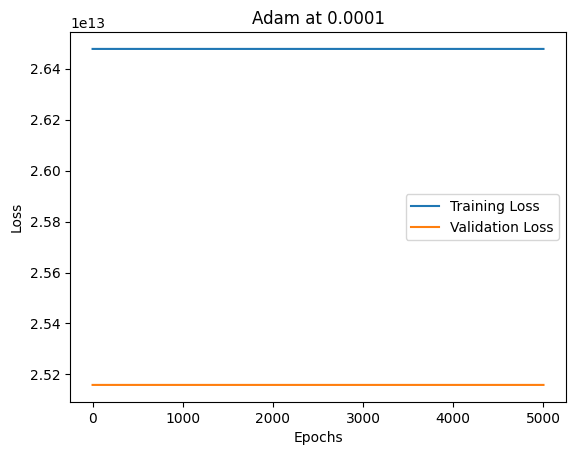

In [43]:
#initialize learning rates and optimizers
learning_rates = [0.1, 0.01, 0.001, 0.0001]
opts = ['SGD','Adam']


for curr_opt in opts:
  print("\n\nCurrent optimizer: "+curr_opt)
  for lr in learning_rates:

      #initializing parameters
      parameters = torch.tensor([1.0, 0.0, 0.0, 0.0, 0.0, 0.0], requires_grad=True)

      #setting up the current optimizer with the current learning rate
      if curr_opt == 'SGD':
        optim = opt.SGD([parameters], lr=lr)
        print("\nNow testing SGD at learning rate:",lr)
      elif curr_opt == 'Adam':
        optim = opt.Adam([parameters], lr=lr)
        print("\nNow testing Adam at learning rate:",lr)
      else:
        print("What?")

      #running the training loop
      curr_train_loss, curr_val_loss = training_loop(n_epochs = 5000, opt = optim, params = parameters, x_train = x_train, y_train = y_train, x_test = x_test, y_test = y_test)


      print(len(curr_train_loss))
      plt.figure()
      plt.plot(range(0, len(curr_train_loss)), curr_train_loss, label="Training Loss")
      plt.plot(range(0, len(curr_val_loss)), curr_val_loss, label="Validation Loss")
      plt.title(f"{curr_opt} at {lr}")
      plt.xlabel("Epochs")
      plt.ylabel("Loss")
      plt.legend()
      plt.show()









